In [42]:
from sklearn.datasets import make_circles
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
X,Y=make_circles(n_samples=100,factor=0.1,noise=0.1)

In [43]:
X.shape

(100, 2)

In [44]:
Y.shape

(100,)

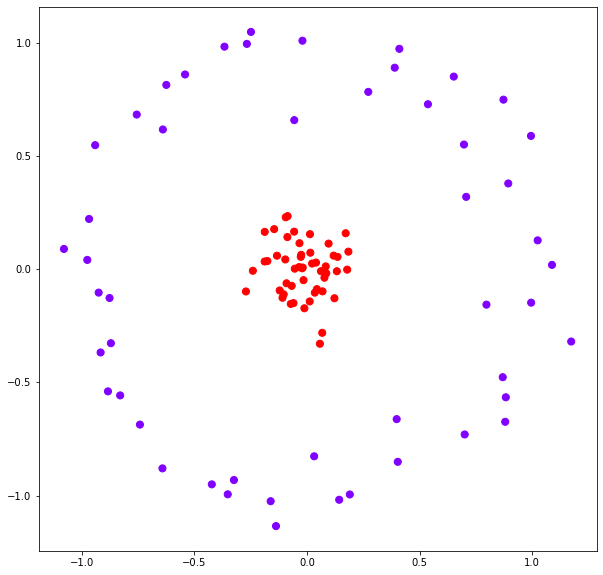

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")
plt.show()

In [46]:
#现在使用线性支持向量机来划分
from sklearn.svm import SVC
def plot_svm_decision_function(model,level,linestyle,ax=None):
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    x,y=np.meshgrid(x,y)
    xy=np.vstack([x.ravel(),y.ravel()]).T
    z=model.decision_function(xy).reshape(x.shape)
    ax.contour(x,y,z,color="k",levels=level,alpha=0.5,linstyles=linestyle)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

E:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'color', 'linstyles'
  del sys.path[0]


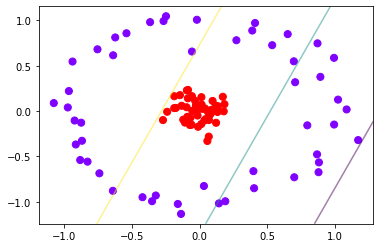

In [47]:
clf=SVC(kernel="linear").fit(X,Y)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")
plot_svm_decision_function(clf,[-1,0,1],["--","-","--"])

In [48]:
# 由上图可得，线性的支持向量机并不适合这一类的分类
# 定义一个由X计算出来的新维度r

r=np.exp(-(X**2).sum(1))

In [49]:
rlim=np.linspace(min(r),max(r),100)

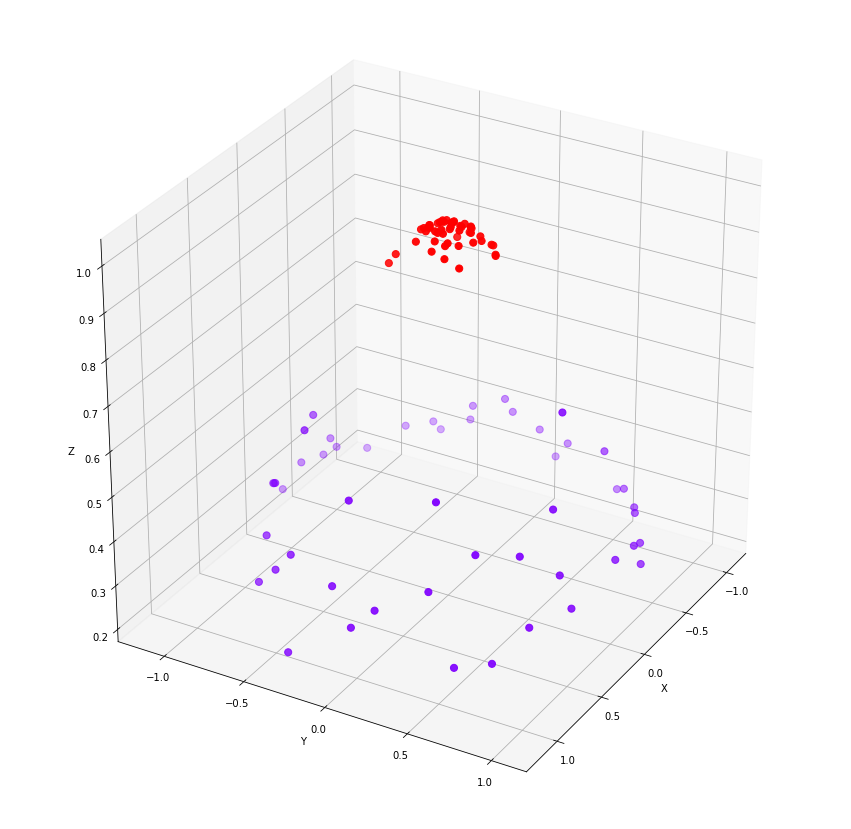

In [50]:
#elev表示上下旋转的角度
#azim表示平行旋转的角度
def plot_3D(elev=30,azim=30,X=X,Y=Y):
    plt.figure(figsize=(15,15))
    ax=plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=Y,s=50,cmap="rainbow")
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()
plot_3D()

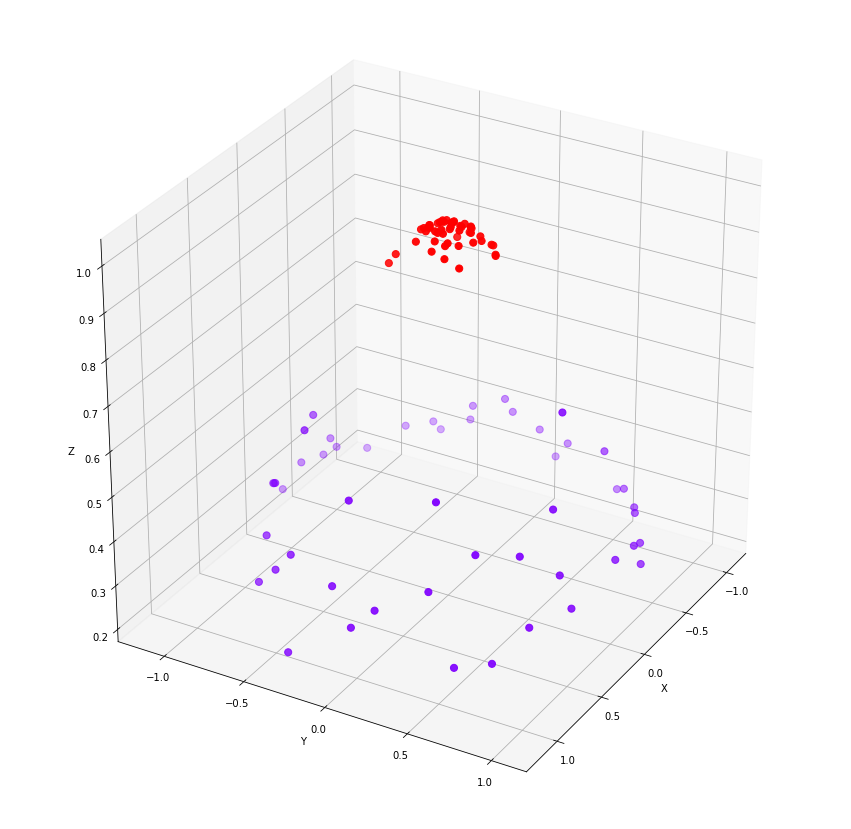

In [51]:
from ipywidgets import interact,fixed
interact(plot_3D,elev=[0,30,60,90,120],azip=(-180,180),X=fixed(X),Y=fixed(Y))
plt.show()

E:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'color', 'linstyles'
  del sys.path[0]


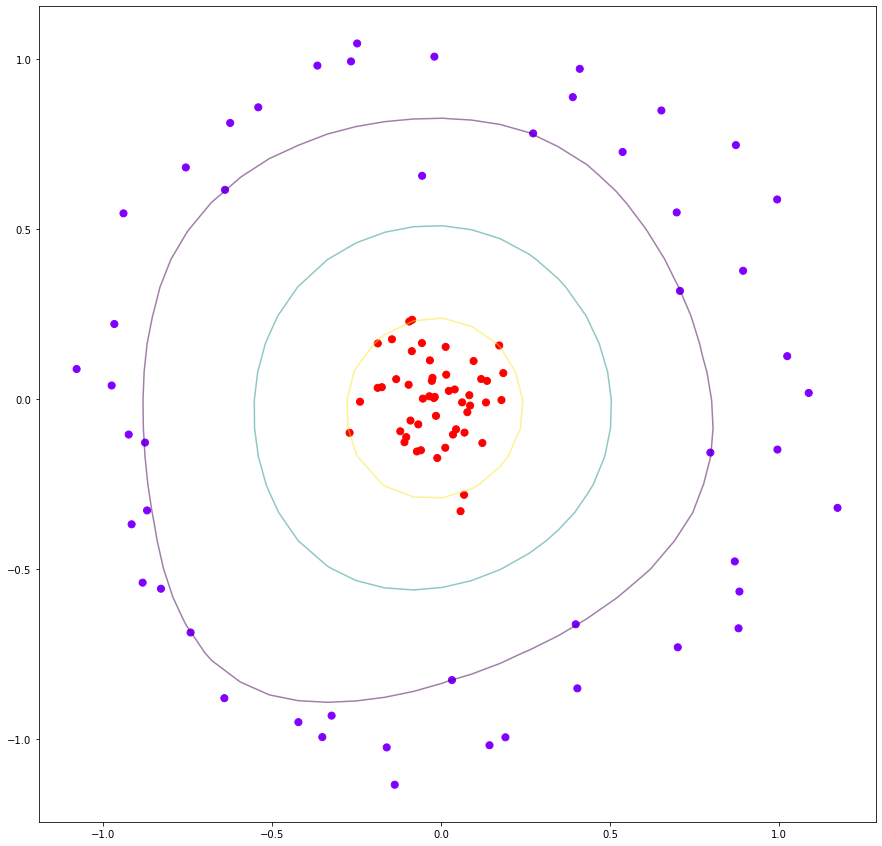

In [53]:
'''

这种变换非常巧妙，但也带有一些实现问题。 
首先，我们可能不清楚应该什么样的数据应该使用什么类型的映射数来确保可以在变换空间中找出线性决策边界。
极端情况下，数据可能会被映射到无限维度的空间中，这种高维空间可能不是那么友好，维度越多，推导和计算的难度都会随之暴增。
其次，即使已知适当的映射函数，我们想要计算类似于 这样的点积，计算量可能会无比巨大，要找出超平面所付出的代价是非常昂贵的。
"核函数":用低维空间中的两个向量的点积，来表示高纬空间中任意的两个向量，
核函数主要有一下几种："linear":线性核，解决方向：线性。"poly"：多项式核，解决问题：偏线性，
“sigmoid”双曲正切核，解决问题：非线性，“rbf”：高斯径向基，解决问题：偏非线性
'''
plt.figure(figsize=(15,15))
clf=SVC(kernel="rbf").fit(X,Y)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")
plot_svm_decision_function(clf,[-1,0,1],["--","-","--"])